# 8. Random Forest Regression Model Evaluation by Learning Curve & Error Bar Plot

In this code, we perform k-fold cross validation on the data and calculate the mean squared error (MSE) of the model on the training set and validation set. First, the model is trained with training sets of different sizes and the average error and standard deviation (generating error bars) are calculated through multiple repetitions. Finally, we draw a learning curve to show the training error and validation error of the model under different training set sizes, and use error bars to measure the volatility of the model performance. This helps to evaluate the model's fit and generalization ability.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

df_y2 = pd.read_csv('../data/train_test/rf_data_Y2.csv')
df_y3 = pd.read_csv('../data/train_test/rf_data_Y3.csv')

#df_y2 = df_y2.sample(n=10000, random_state=42)
df_y2

,AgeAtFirstClaim,ClaimsCount,Unique_ProviderID,Unique_Vendor,PayDelay,Diagnostic Imaging,Emergency,General Practice,Internal,Surgery,...,1-2,EM,MED,PL,RAD,SDS,0- 1 month,DrugCount,LabCount,DaysInHospital
0,35.0,6.0,3.0,3.0,308.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,4.0,1.0,0.0,0.0,2.0,0.0,1.0,0
1,5.0,5.0,4.0,3.0,148.0,1.0,0.0,0.0,1.0,0.0,...,0.0,2.0,0.0,1.0,1.0,0.0,1.0,3.0,2.0,0
2,15.0,11.0,8.0,8.0,608.0,3.0,3.0,0.0,1.0,1.0,...,0.0,3.0,0.0,1.0,4.0,1.0,7.0,0.0,3.0,1
3,5.0,12.0,4.0,4.0,637.0,1.0,0.0,4.0,0.0,0.0,...,0.0,3.0,3.0,3.0,1.0,0.0,3.0,0.0,5.0,0
4,35.0,8.0,6.0,5.0,320.0,1.0,1.0,3.0,2.0,0.0,...,0.0,6.0,0.0,1.0,1.0,0.0,1.0,13.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51961,65.0,16.0,5.0,4.0,553.0,0.0,0.0,8.0,1.0,0.0,...,0.0,7.0,3.0,5.0,0.0,0.0,8.0,10.0,13.0,0
51962,80.0,14.0,6.0,4.0,1081.0,1.0,0.0,8.0,3.0,0.0,...,10.0,5.0,2.0,3.0,1.0,0.0,3.0,22.0,5.0,0
51963,15.0,4.0,3.0,3.0,115.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,5.0,3.0,0
51964,65.0,6.0,2.0,2.0,235.0,0.0,0.0,0.0,6.0,0.0,...,3.0,4.0,0.0,0.0,0.0,0.0,5.0,27.0,0.0,0


In [2]:
# get features and label from the the data
X_y2 = df_y2.drop(['DaysInHospital'], axis=1)
y_y2 = df_y2['DaysInHospital']

X_y3 = df_y3.drop(['DaysInHospital'], axis=1)
y_y3 = df_y3['DaysInHospital'] 

In [4]:
def k_fold_cross_validation(X, y, k, model):
    """
    Implement k-fold cross validation.

    Parameters:
    X: feature dataset.
    y: label dataset.
    k: number of folds.
    model: model to be trained (model trained on each fold).

    Return value:
    Returns the mean squared error (MSE) for both training and validation sets.
    """
    np.random.seed(42)
    fold_size = len(X) // k  # Size of each fold
    indices = np.random.permutation(len(X))  # Randomly shuffle the dataset
    train_mse_scores = []  # Store the MSE of the training set in each fold
    val_mse_scores = []  # Store the MSE of the validation set in each fold

    # Perform k-fold cross validation
    for i in range(k):
        val_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])

        X_train, X_val = X.iloc[train_indices], X.iloc[val_indices]
        y_train, y_val = y.iloc[train_indices], y.iloc[val_indices]

        # Train the model on the training set
        model.fit(X_train, y_train)

        # Predict on the training set
        y_train_pred = model.predict(X_train)
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_mse_scores.append(train_mse)

        # Predict on the validation set
        y_val_pred = model.predict(X_val)
        val_mse = mean_squared_error(y_val, y_val_pred)
        val_mse_scores.append(val_mse)

    # Return the mean squared error for both training and validation sets
    return np.mean(train_mse_scores), np.mean(val_mse_scores)



In [5]:
def plot_learning_curve_with_error_bars(X, y, model, train_sizes=np.linspace(0.1, 1.0, 10), repetitions=20, k=5):
    """
    Plot learning curve with error bars for a given model across repetitions.
    
    Parameters:
    X, y : Dataset (features and labels)
    model : Model to be trained
    train_sizes : Array of training sizes
    repetitions : Number of independent repetitions for error bar computation
    k : Number of folds for cross-validation
    
    Returns:
    Learning curves with error bars
    """
    train_errors = []
    validation_errors = []

    for train_size in train_sizes:
        train_mse_reps = []
        val_mse_reps = []

        for _ in range(repetitions):
            # Split data into training and validation sets
            X_train, y_train = X.sample(frac=train_size), y.sample(frac=train_size)
            X_val, y_val = X.drop(X_train.index), y.drop(y_train.index)

            # K-fold cross-validation
            train_mse, val_mse = k_fold_cross_validation(X_train, y_train, k, model)
            train_mse_reps.append(train_mse)
            val_mse_reps.append(val_mse)

        # Compute mean and std across repetitions for error bars
        train_errors.append((np.mean(train_mse_reps), np.std(train_mse_reps)))
        validation_errors.append((np.mean(val_mse_reps), np.std(val_mse_reps)))

    # Plotting the learning curve
    train_means, train_stds = zip(*train_errors)
    val_means, val_stds = zip(*validation_errors)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_means, 'o-', label='Training Error', color='blue')
    plt.plot(train_sizes, val_means, 'o-', label='Validation Error', color='green')

    # Add error bars
    plt.fill_between(train_sizes, np.array(train_means) - np.array(train_stds), 
                     np.array(train_means) + np.array(train_stds), alpha=0.2, color='blue')
    plt.fill_between(train_sizes, np.array(val_means) - np.array(val_stds), 
                     np.array(val_means) + np.array(val_stds), alpha=0.2, color='green')

    plt.title('Learning Curve with Error Bars (MSE)')
    plt.xlabel('Training Size')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()




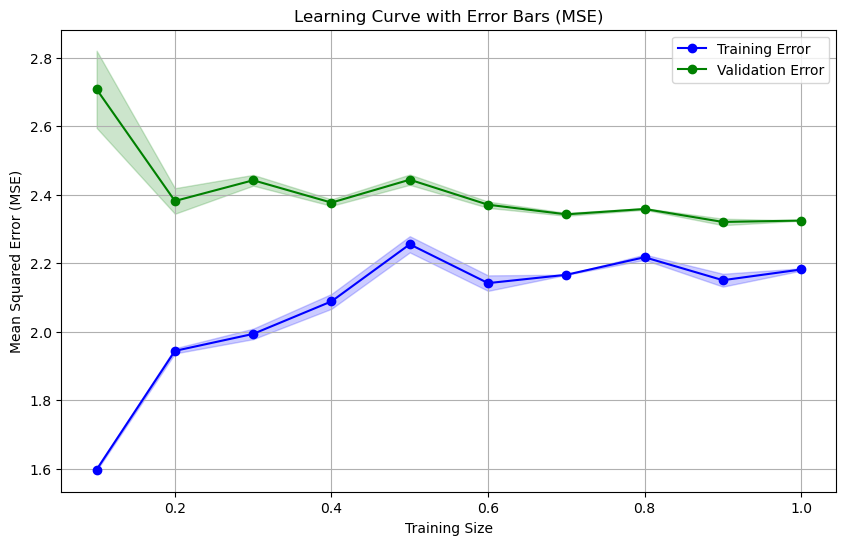

In [6]:
# Assuming X and y are your dataset and labels
final_model = RandomForestRegressor(n_estimators=180, max_depth=9, random_state=42, n_jobs=-1)
plot_learning_curve_with_error_bars(X_y2, y_y2, final_model)

In [8]:
# Use the optimal hyperparameters to train the final model and make predictions
final_model = RandomForestRegressor(n_estimators=180, max_depth= 9, random_state=42, n_jobs=-1)
final_model.fit(X_y2, y_y2)
y_pred_y3 = final_model.predict(X_y3)

# Evaluate the model's performance on the third year's data
mse_y3 = mean_squared_error(y_y3, y_pred_y3)
print(f"Mean Squared Error on Year 3 data(hyperparameter changed model): {mse_y3}")

Mean Squared Error on Year 3 data(hyperparameter changed model): 0.6451144060082579
